In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
kyp = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Cases\Kyphosis\Kyphosis.csv")
le = LabelEncoder()
y = le.fit_transform(kyp["Kyphosis"])
X = kyp.drop('Kyphosis',axis=1)

In [12]:
## Train_test split whole tree

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=24)

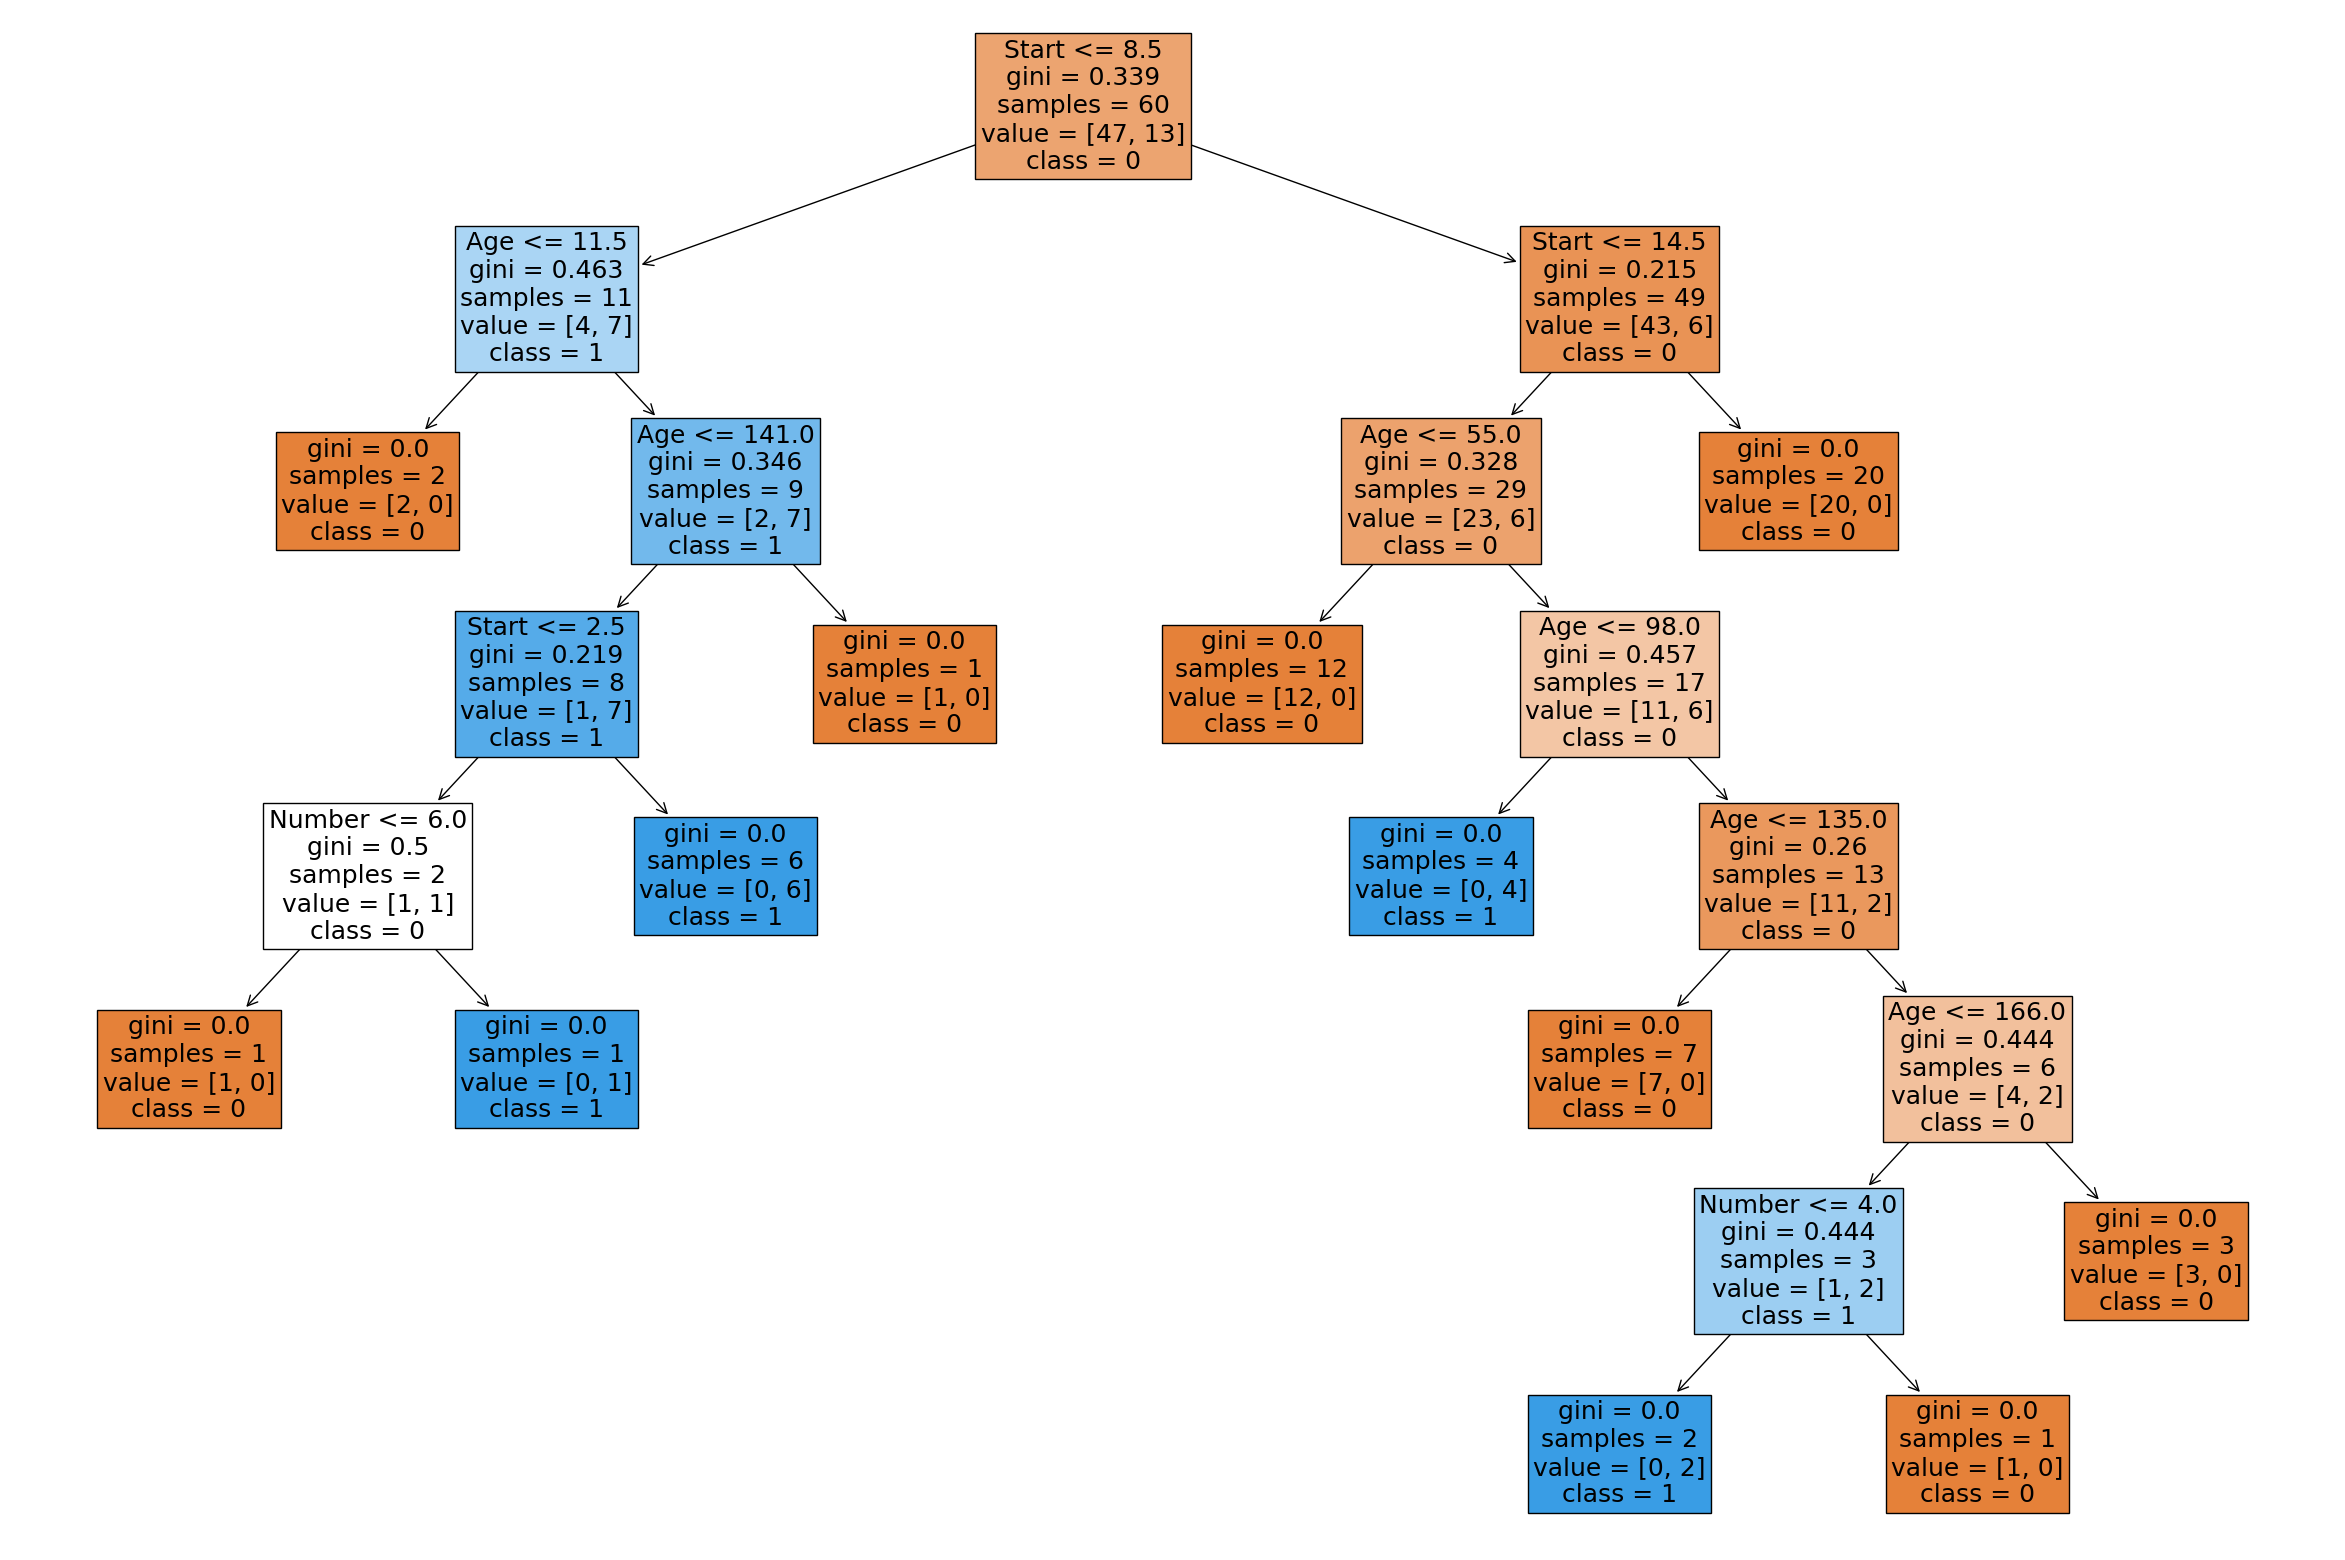

In [13]:
dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X_train, y_train)

plt.figure(figsize=(30,20))
plot_tree(dtc,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=18)
plt.show() 

In [11]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6666666666666666


In [ ]:
## Grid search for parameters max_deapth, min samples split, mean samples leaf

In [16]:
kfold = StratifiedKFold(n_splits =5,shuffle = True, random_state = 24)
dtc = DecisionTreeClassifier(random_state=24)
params= {"max_depth":[None,2,3,4],"min_samples_split": [2,4,6,10,20],"min_samples_leaf":[1,5,10,15]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring="neg_log_loss")# default scoring r2

gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
-0.8025112313520752


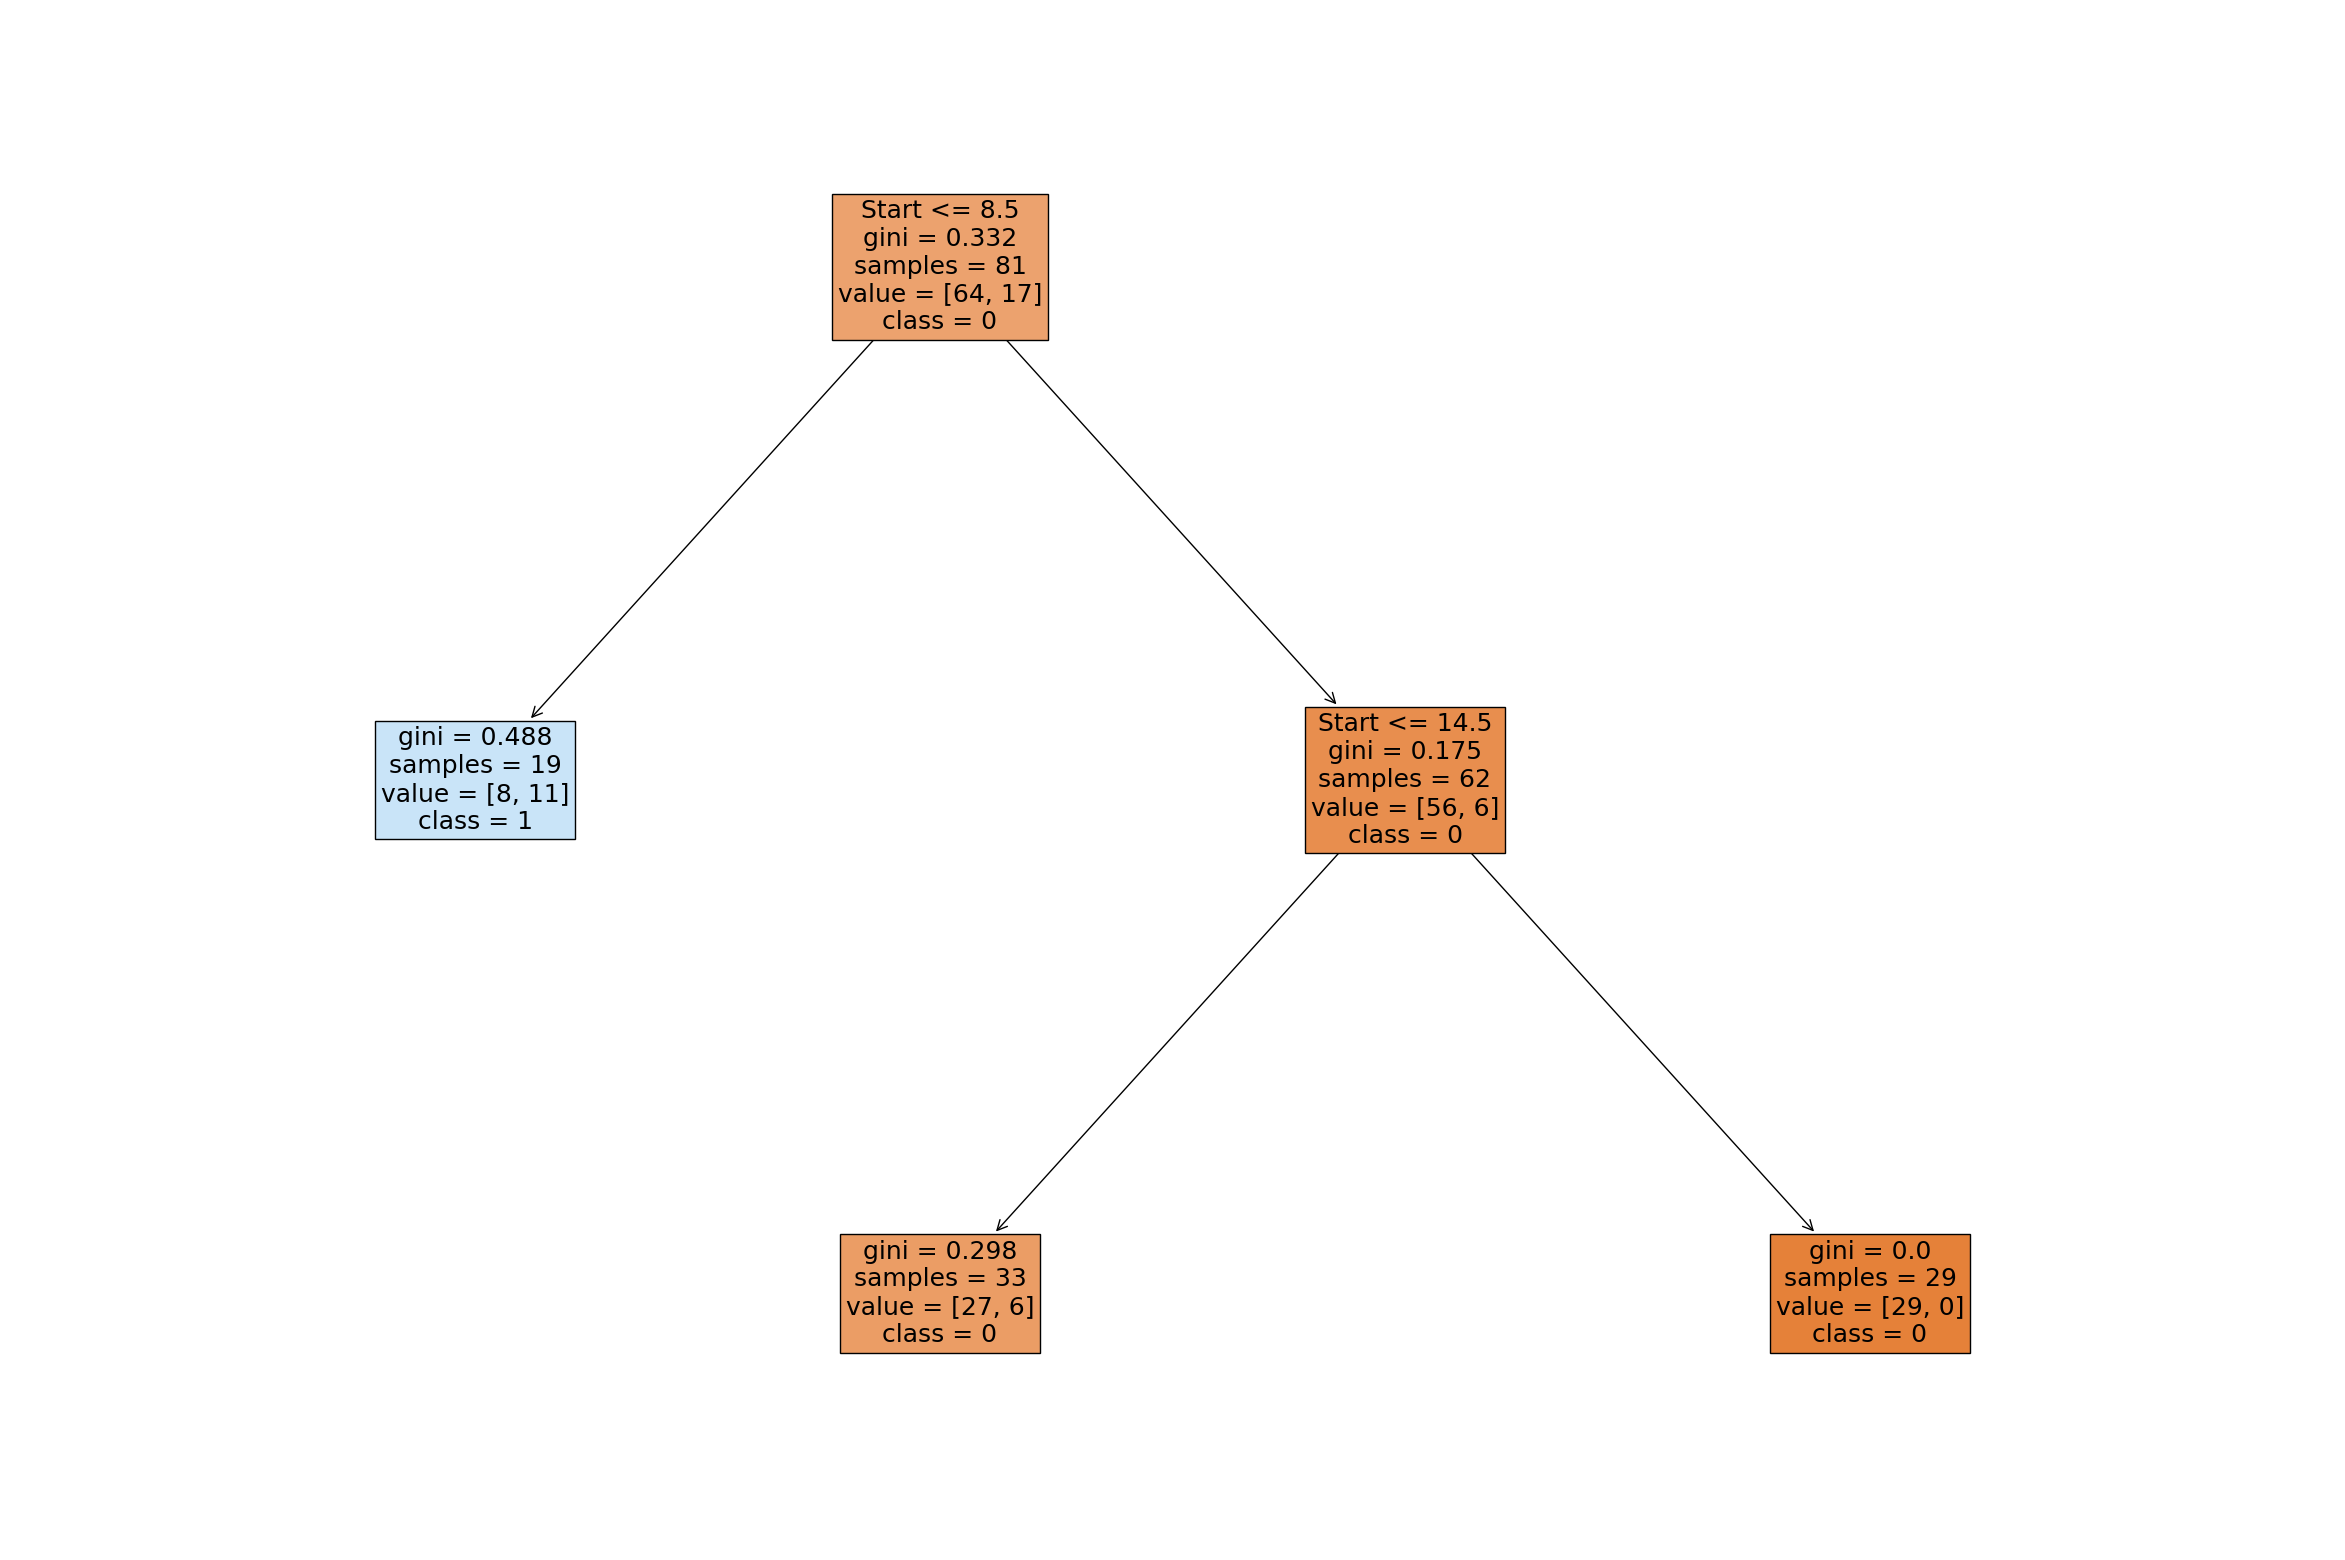

In [17]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(30,20))
plot_tree(best_tree,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=18)
plt.show() 